In [2]:
import gensim
import os
from distutils.version import LooseVersion, StrictVersion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re

In [3]:
from gensim.models import Word2Vec

In [4]:
skipgram = Word2Vec.load('w2vtrain300.bin')

In [5]:
len(skipgram.wv)

62269

In [6]:
skipgram.wv.most_similar('đảng', topn=5)

[('đảng_cs', 0.7136954069137573),
 ('ðảng', 0.6780000329017639),
 ('ðảng_csvn', 0.6538808345794678),
 ('đảng_csvn', 0.6428136229515076),
 ('đcsvn', 0.6288626790046692)]

In [7]:
skipgram.wv.most_similar('phản_động', topn=20)

[('tráo_trở', 0.6318236589431763),
 ('nguyên_thạch', 0.6199137568473816),
 ('phạm_minh_vũ', 0.6130055785179138),
 ('quốc_tế_pháp', 0.6047990322113037),
 ('công_kích', 0.6016861200332642),
 ('mạc_văn_trang', 0.5931606888771057),
 ('thu_hà', 0.5907239317893982),
 ('phần_tử', 0.5889787077903748),
 ('một_lần', 0.588546872138977),
 ('thù_địch', 0.5864093899726868),
 ('a_dua', 0.5802571177482605),
 ('hoảng_hiền', 0.5758891701698303),
 ('quy_chụp', 0.5749534368515015),
 ('cách_mạng_việt_nam', 0.5728639364242554),
 ('hồ_đồ', 0.5715383887290955),
 ('quy_tội', 0.5699607729911804),
 ('_bọn', 0.5640934109687805),
 ('lươn_lẹo', 0.5636618137359619),
 ('nguyễn_hữu_vĩnh', 0.5634613037109375),
 ('thâm_độc', 0.5632556676864624)]

In [14]:
data = pd.read_csv('final_data.csv')

In [15]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Title_processed,Content_processed,label,Length
0,0,1,thúc_đẩy quan_hệ hợp_tác quốc_hội việt_nam nhâ...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,274
1,1,2,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,229
2,2,3,giám_đốc công_an hà_nội vụ_án rửa tiền ước_tín...,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,1,229
3,3,4,ông võ_văn_thưởng hội_đàm trực_tuyến bí_thư ba...,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,1,79
4,4,5,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,1,299


In [16]:
stringdata=[]
for i in range(len(data)):
    stringdata.append(str(data.Title_processed[i])+' '+str(data.Content_processed[i]))


In [17]:
data['Title_Content_processed']=stringdata

In [18]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data
 

data_clean = removeOutliers(data, "Length").reset_index()

In [19]:
data_clean.head()

,index,Unnamed: 0.1,Unnamed: 0,Title_processed,Content_processed,label,Length,Title_Content_processed
0,0,0,1,thúc_đẩy quan_hệ hợp_tác quốc_hội việt_nam nhâ...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,274,thúc_đẩy quan_hệ hợp_tác quốc_hội việt_nam nhâ...
1,1,1,2,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,229,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
2,2,2,3,giám_đốc công_an hà_nội vụ_án rửa tiền ước_tín...,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,1,229,giám_đốc công_an hà_nội vụ_án rửa tiền ước_tín...
3,3,3,4,ông võ_văn_thưởng hội_đàm trực_tuyến bí_thư ba...,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,1,79,ông võ_văn_thưởng hội_đàm trực_tuyến bí_thư ba...
4,4,4,5,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,1,299,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...


In [20]:
len(data_clean.Content_processed.iloc[0].split())

274

In [22]:
from sklearn.manifold import TSNE
import plotly.express as px
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [23]:
def FunctionText2Vec(inpTextData):
    W2Vec_Data=pd.DataFrame()
    for i in inpTextData:
        Sentence = np.zeros(300)
        WordsVocab=str(i).split()
        for word in WordsVocab:
            try:
                Sentence=Sentence+skipgram.wv[word]
            except:
                Sentence=Sentence+np.zeros(300)
        Sentence=Sentence/len(WordsVocab)
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))     
    return(W2Vec_Data)

In [24]:
W2Vec_Data=FunctionText2Vec(data_clean['Title_Content_processed'])

C:\Users\hotai\AppData\Local\Temp\ipykernel_14792\2665405856.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_14792\2665405856.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_14792\2665405856.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_14792\2665405856.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.a

In [25]:
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.175345,-0.036735,0.125451,-0.071224,-0.018752,-0.207590,0.194758,0.321946,-0.098030,-0.013767,...,-0.103502,0.432649,-0.061054,0.111330,0.008496,0.326993,0.009956,0.115771,0.019895,-0.067544
0,0.260276,-0.037195,0.118308,-0.058290,-0.016205,-0.173600,0.194483,0.299503,-0.113716,0.016384,...,-0.113432,0.424589,-0.069370,0.078613,0.002976,0.335438,0.022576,0.155417,0.010345,-0.110369
0,0.058667,-0.015813,0.104816,-0.149720,-0.027348,-0.211314,0.272067,0.409743,-0.052000,-0.036365,...,-0.101663,0.374725,-0.026040,0.140584,0.036225,0.325023,0.032504,0.086834,0.149907,-0.098418
0,0.085500,-0.115454,0.221506,-0.092703,0.050961,-0.102798,0.080192,0.402627,-0.059263,-0.084764,...,-0.127634,0.414037,-0.108953,0.182066,0.052343,0.303062,-0.096597,0.220671,0.044242,-0.130406
0,0.223552,-0.041918,0.133344,-0.097534,0.012194,-0.209553,0.196645,0.314875,-0.136005,-0.002832,...,-0.072600,0.424012,-0.066887,0.166554,0.032968,0.336673,0.056238,0.114825,0.033393,-0.080915


In [26]:
W2Vec_Data.shape

(1987, 300)

In [27]:
len(data_clean)

1987

In [28]:
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['label']=data_clean['label']
W2Vec_Data['index']=data_clean['index']

In [29]:
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,index
0,0.175345,-0.036735,0.125451,-0.071224,-0.018752,-0.207590,0.194758,0.321946,-0.098030,-0.013767,...,-0.061054,0.111330,0.008496,0.326993,0.009956,0.115771,0.019895,-0.067544,1,0
1,0.260276,-0.037195,0.118308,-0.058290,-0.016205,-0.173600,0.194483,0.299503,-0.113716,0.016384,...,-0.069370,0.078613,0.002976,0.335438,0.022576,0.155417,0.010345,-0.110369,1,1
2,0.058667,-0.015813,0.104816,-0.149720,-0.027348,-0.211314,0.272067,0.409743,-0.052000,-0.036365,...,-0.026040,0.140584,0.036225,0.325023,0.032504,0.086834,0.149907,-0.098418,1,2
3,0.085500,-0.115454,0.221506,-0.092703,0.050961,-0.102798,0.080192,0.402627,-0.059263,-0.084764,...,-0.108953,0.182066,0.052343,0.303062,-0.096597,0.220671,0.044242,-0.130406,1,3
4,0.223552,-0.041918,0.133344,-0.097534,0.012194,-0.209553,0.196645,0.314875,-0.136005,-0.002832,...,-0.066887,0.166554,0.032968,0.336673,0.056238,0.114825,0.033393,-0.080915,1,4


In [30]:
W2Vec_Data.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
297      0
298      0
299      0
label    0
index    0
Length: 302, dtype: int64

In [31]:
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,index
0,0.175345,-0.036735,0.125451,-0.071224,-0.018752,-0.207590,0.194758,0.321946,-0.098030,-0.013767,...,-0.061054,0.111330,0.008496,0.326993,0.009956,0.115771,0.019895,-0.067544,1,0
1,0.260276,-0.037195,0.118308,-0.058290,-0.016205,-0.173600,0.194483,0.299503,-0.113716,0.016384,...,-0.069370,0.078613,0.002976,0.335438,0.022576,0.155417,0.010345,-0.110369,1,1
2,0.058667,-0.015813,0.104816,-0.149720,-0.027348,-0.211314,0.272067,0.409743,-0.052000,-0.036365,...,-0.026040,0.140584,0.036225,0.325023,0.032504,0.086834,0.149907,-0.098418,1,2
3,0.085500,-0.115454,0.221506,-0.092703,0.050961,-0.102798,0.080192,0.402627,-0.059263,-0.084764,...,-0.108953,0.182066,0.052343,0.303062,-0.096597,0.220671,0.044242,-0.130406,1,3
4,0.223552,-0.041918,0.133344,-0.097534,0.012194,-0.209553,0.196645,0.314875,-0.136005,-0.002832,...,-0.066887,0.166554,0.032968,0.336673,0.056238,0.114825,0.033393,-0.080915,1,4


In [32]:
TargetVariable=DataForML.columns[-2:]
Predictors=DataForML.columns[:-2]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [33]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [34]:
PredictorScaler=MinMaxScaler()
 

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1390, 300)
(1390, 2)
(597, 300)
(597, 2)


Visualize

In [37]:
pca_breast = PCA(n_components=2)
x_train_pca2 = pca_breast.fit_transform(X_train)

In [38]:
x_train_pca2_Df = pd.DataFrame(data = x_train_pca2, columns = ['x', 'y'])

In [39]:
y_label=[]
for i in y_train:
    y_label.append(i[0])
 

<AxesSubplot:xlabel='x', ylabel='y'>

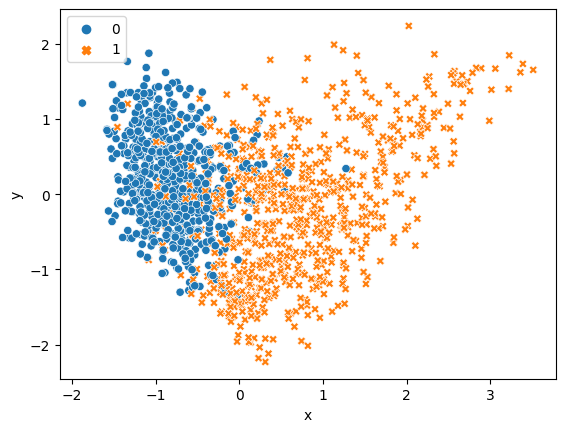

In [40]:
sns.scatterplot(x = x_train_pca2_Df.x, y=x_train_pca2_Df.y,
               hue = y_label, style=y_label)

In [41]:
pca_breast = PCA(n_components=3)
x_train_pca3 = pca_breast.fit_transform(X_train)

In [42]:
x_train_pca3_Df = pd.DataFrame(data = x_train_pca3, columns = ['x', 'y','z'])

In [43]:
fig = px.scatter_3d(
    x_train_pca3_Df, x="x", y="y", z="z",
    color=y_label, labels={'color': 'label'}
)
fig.update_traces(marker_size=3)
fig.show()

t-SNE visualine

In [44]:
features = X_train

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=y_label, labels={'color': 'Label'},
)
fig.update_traces(marker_size=3)
fig.show()

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [45]:
from sklearn.model_selection import GridSearchCV

K-Nearest Neighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [47]:
y_train1=[]

In [48]:
for i in y_train:
    y_train1.append(i[0])

In [49]:
y_test1=[]

In [50]:
for i in y_test:
    y_test1.append(i[0])

In [51]:
k_range = list(range(3, 11,2))
param_grid = {'n_neighbors':k_range, 'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

In [52]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [53]:
grid_search=grid.fit(X_train, y_train1)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [54]:
print(grid_search.best_params_) 

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [55]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# Define grid search
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=grid_params, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train1)
# Print grid search summary
grid_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [56]:
clf = KNeighborsClassifier(n_neighbors = 5,p=2,weights='distance',metric='manhattan')
clf.fit(X_train, y_train1)
y_pred = clf.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))

Accuracy: 0.9581239530988275


In [58]:
print("f1 score:",metrics.f1_score(y_test1, y_pred))

f1 score: 0.960127591706539


In [59]:
from sklearn.metrics import confusion_matrix
lang=['fake','real']
cm= confusion_matrix(y_test1, y_pred)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

In [60]:
print(cm)
print(classification_report(y_test1,y_pred,digits=4))

[[271   4]
 [ 21 301]]
              precision    recall  f1-score   support

           0     0.9281    0.9855    0.9559       275
           1     0.9869    0.9348    0.9601       322

    accuracy                         0.9581       597
   macro avg     0.9575    0.9601    0.9580       597
weighted avg     0.9598    0.9581    0.9582       597



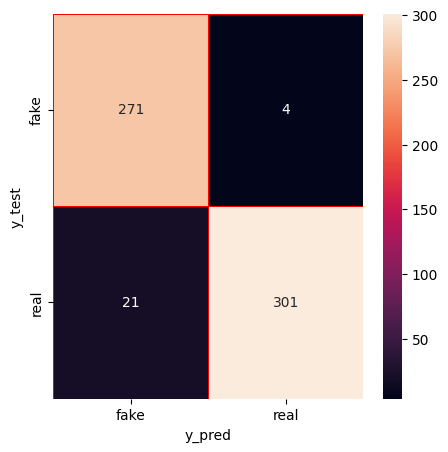

In [61]:

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [62]:
for i in range(len(y_test1) ):
    if y_test1[i] != y_pred[i]:
        print(i)


79
81
85
113
118
167
178
185
196
215
222
226
263
301
361
370
398
440
462
474
540
588
591
595
596


In [63]:
import joblib 

In [64]:
joblib.dump(clf, 'Word2Vec_KNN.pkl', compress=9)

['Word2Vec_KNN.pkl']

In [65]:
knn = joblib.load('Word2Vec_KNN.pkl')

In [66]:
y_pred_1 = knn.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_1))

Accuracy: 0.9581239530988275


Neive bayes

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB,ComplementNB

In [69]:
param_NB={'var_smoothing':[1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]}

In [70]:
grid = GridSearchCV(GaussianNB(), param_NB, refit = True, verbose = 3) 

In [71]:
grid.fit(X_train, y_train1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...............var_smoothing=1e-05;, score=0.917 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-05;, score=0.932 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-05;, score=0.921 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-05;, score=0.953 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-05;, score=0.939 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-06;, score=0.917 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-06;, score=0.932 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-06;, score=0.921 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-06;, score=0.953 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-06;, score=0.939 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.917 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-05, 1e-06, 1e-07, 1e-08, 1e-09,
                                           1e-10, 1e-11, 1e-12]},
             verbose=3)

In [72]:
print(grid.best_params_) 

{'var_smoothing': 1e-05}


In [73]:
print(grid.best_estimator_) 

GaussianNB(var_smoothing=1e-05)


In [74]:
clf = GaussianNB(var_smoothing=1e-05)

In [75]:
clf.fit(X_train, y_train1)

GaussianNB(var_smoothing=1e-05)

In [76]:
y_pred1 = clf.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.931323283082077


In [78]:

cm= confusion_matrix(y_test1, y_pred1)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

In [79]:
print(cm)
print(classification_report(y_test1,y_pred1,digits=4))

[[251  24]
 [ 17 305]]
              precision    recall  f1-score   support

           0     0.9366    0.9127    0.9245       275
           1     0.9271    0.9472    0.9370       322

    accuracy                         0.9313       597
   macro avg     0.9318    0.9300    0.9308       597
weighted avg     0.9314    0.9313    0.9312       597



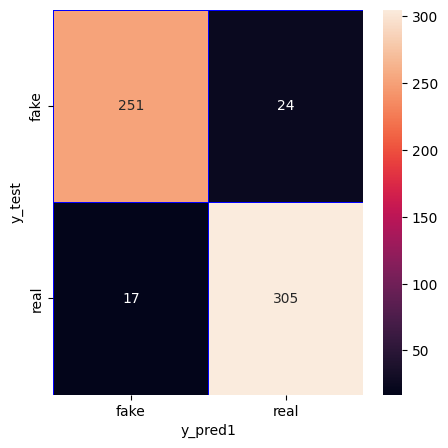

In [80]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax)

plt.xlabel("y_pred1")
plt.ylabel("y_test")
plt.show()

In [81]:
for i in range(len(y_test1) ):
    if y_test1[i] != y_pred1[i]:
        print(i)


4
40
54
63
65
68
70
79
80
84
85
113
126
132
135
136
171
184
185
222
226
229
246
290
296
312
347
398
402
404
411
440
458
465
501
507
536
538
540
571
596


In [82]:
joblib.dump(clf, 'Word2Vec_NeiveBayes.pkl', compress=9)

['Word2Vec_NeiveBayes.pkl']

In [83]:
NB= joblib.load('Word2Vec_NeiveBayes.pkl')

In [84]:
y_pred_2 = NB.predict(X_test)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_2))

Accuracy: 0.931323283082077


SVM

In [86]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train, y_train1)

SVC(kernel='linear')

In [87]:
y_pred3 = svclassifier.predict(X_test)

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred3))

Accuracy: 0.9698492462311558


In [89]:
cm= confusion_matrix(y_test1, y_pred3)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

In [90]:
print("F1-score:",metrics.f1_score(y_test1, y_pred3))

F1-score: 0.9721362229102167


In [91]:
print(cm)
print(classification_report(y_test1,y_pred3,digits=4))

[[265  10]
 [  8 314]]
              precision    recall  f1-score   support

           0     0.9707    0.9636    0.9672       275
           1     0.9691    0.9752    0.9721       322

    accuracy                         0.9698       597
   macro avg     0.9699    0.9694    0.9696       597
weighted avg     0.9699    0.9698    0.9698       597



In [92]:
joblib.dump(svclassifier, 'Word2Vec_SVM.pkl', compress=9)

['Word2Vec_SVM.pkl']

In [93]:
SVM= joblib.load('Word2Vec_SVM.pkl')

In [94]:
y_pred_3 = SVM.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_3))

Accuracy: 0.9698492462311558


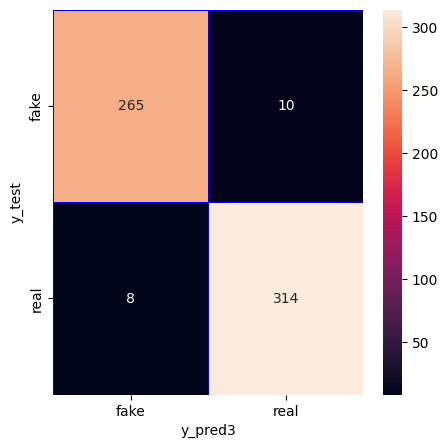

In [96]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax)

plt.xlabel("y_pred3")
plt.ylabel("y_test")
plt.show()

In [97]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# Define grid search
grid_search = GridSearchCV(estimator= SVC(), 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=2)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train1)
# Print grid search summary
grid_result.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [98]:
svclassifier = SVC(C=10,kernel='rbf',gamma=0.1)

svclassifier.fit(X_train, y_train1)

SVC(C=10, gamma=0.1)

In [99]:
y_pred_3 = SVM.predict(X_test)

In [100]:
index_co=[]

In [101]:
for i in range(len(y_test1) ):
    if y_test1[i] != y_pred3[i]:
        index_co.append(y_test[i][1])


In [102]:
index_co

[244,
 1611,
 88,
 94,
 1242,
 1805,
 611,
 1761,
 20,
 1588,
 1739,
 1716,
 700,
 71,
 1416,
 1936,
 702,
 1504]

TEST

In [104]:
stop = pd.read_csv("D:/Ki7/PBL6/vietnamese.txt")
stop = stop.values.tolist()
stop_words=[]
for i in range(len(stop)):
    stop_words.append(stop[i][0].replace(' ','_'))

In [105]:
def remove_stop_words(text):
    results = []
   
    tmp = text.split(' ')
    for stop_word in stop_words:
        if stop_word in tmp:
            tmp.remove(stop_word)
    results.append(" ".join(tmp))
        
    return results

In [106]:
import re
from underthesea import word_tokenize

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
     
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # tách từ
    document = word_tokenize(document, format="text")
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\underthesea\utils\__init__.py:12: UserWarning:

Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)



In [107]:
News_Title="Thúc đẩy hợp tác, hướng tới kỷ niệm 10 năm quan hệ Đối tác Chiến lược Việt Nam-Thái Lan."
News_Content="Tại buổi gặp gỡ báo chí, Chủ tịch nước Nguyễn Xuân Phúc cho biết đã cùng Thủ tướng Thái Lan thống nhất nhiều nội dung quan trọng tại hội đàm, trong đó có việc thúc đẩy hợp tác để hướng tới kỷ niệm 10 năm quan hệ Đối tác Chiến lược Việt Nam-Thái Lan. Theo đó, hai bên nhất trí tăng cường hiểu biết và tin cậy chính trị thông qua trao đổi các chuyến thăm cấp cao và các cấp; tổ chức vào thời gian phù hợp cho cuộc họp Nội các chung do Thủ tướng hai nước đồng chủ trì và các cơ chế hợp tác song phương khác. Hai bên sẽ phối hợp thực hiện hiệu quả Chương trình Hành động triển khai quan hệ Đối tác Chiến lược tăng cường Việt Nam-Thái Lan giai đoạn 2022-2027 cũng như các thỏa thuận đã được ký kết trên các lĩnh vực. Chủ tịch nước nhấn mạnh “Chúng tôi nhất trí phấn đấu đưa kim ngạch thương mại hai nước đạt mục tiêu 25 đến 30 tỷ USD vào năm 2025 theo hướng cân bằng và bền vững hơn; tạo thuận lợi lưu thông hàng hóa và dịch vụ hai nước. Đồng thời, tạo thuận lợi cho doanh nghiệp hai nước tăng cường hợp tác đầu tư, kinh doanh, kể cả trong các lĩnh vực mới như kinh tế số, tăng trưởng xanh và phát triển bền vững....”.Chủ tịch nước cũng cho biết, các lĩnh vực hợp tác quan trọng về kết nối hạ tầng, nông nghiệp, hỗ trợ phát triển, lao động, văn hóa, du lịch, giao lưu doanh nghiệp, nhân dân, địa phương sẽ là trọng tâm của quan hệ Đối tác Chiến lược tăng cường hai nước. Đã có 19 địa phương của Việt Nam và Thái Lan ký kết hợp và hôm nay có tỉnh Khỏn Kèn và Đà Nẵng ký kết hợp tác. Trao đổi với báo chí, Thủ tướng Prayut Chan-o-cha khẳng định, Thái Lan và Việt Nam rất coi trọng chuyến thăm lần này với sự tham dự của nhiều lãnh đạo cấp cao từ hai phía. Ngày mai sẽ diễn ra Diễn đàn Doanh nhân Việt Nam-Thái Lan với sự có mặt của hơn 300 đại biểu doanh nhân đến từ hai nước, tập trung tìm kiếm giải pháp phục hồi kinh tế và tăng cường quan hệ hai nước. Chuyến thăm mở ra một kỷ nguyên mới của quan hệ đối tác toàn diện, đặc biệt là nhân dịp hai nước sẽ kỷ niệm 10 năm quan hệ đối tác chiến lược. Thủ tướng Thái Lan nhấn mạnh Thái Lan và Việt Nam là những quốc gia quan trọng về kinh tế trong khu vực, cả về quy mô lẫn tiềm năng phát triển, có hệ thống liên kết thương mại và đầu tư. Thái Lan và Việt Nam đã nhất trí tăng cường quan hệ đối tác kinh tế chặt chẽ để thúc đẩy phục hồi kinh tế xã hội của cả hai quốc gia và khu vực, cả trong liên kết thương mại, đầu tư, giao thông vận tải, nền kinh tế kỹ thuật số. Hai bên cũng nhất trí phối hợp triển khai hình thức thanh toán điện tử thuận tiện và nhanh chóng hơn đối với hàng hóa dịch vụ giữa hai nước, gỡ bỏ các vướng mắc thương mại, đồng thời thúc đẩy hoạt động xuất nhập khẩu hàng hóa sang các nước thứ ba, đặc biệt là các sản phẩm nông nghiệp sản xuất phụ tùng, thiết bị và thuốc. Thủ tướng Thái Lan cũng đánh giá, Thái Lan và Việt Nam là những quốc gia quan trọng về an ninh của các tiểu vùng và khu vực. Do đó, hai bên nhất trí thúc đẩy phát triển quan hệ đối tác vì hòa bình và an ninh chung, thường xuyên trao đổi các chuyến thăm và tham vấn các khuôn khổ cơ chế chính trị, an ninh và quân sự. Điều này góp phần giải quyết các mối đe dọa về an ninh mạng và tội phạm xuyên quốc gia. Sau họp báo, Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân cùng Thủ tướng Thái Lan và Phu nhân tham quan gian hàng trưng bày các sản phẩm thủ công hai nước. Tiếp đó, Thủ tướng Thái Lan và Phu nhân chủ trì tiệc chiêu đãi Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân. Tại buổi gặp gỡ báo chí, Chủ tịch nước Nguyễn Xuân Phúc cho biết đã cùng Thủ tướng Thái Lan thống nhất nhiều nội dung quan trọng tại hội đàm, trong đó có việc thúc đẩy hợp tác để hướng tới kỷ niệm 10 năm quan hệ Đối tác Chiến lược Việt Nam-Thái Lan. Theo đó, hai bên nhất trí tăng cường hiểu biết và tin cậy chính trị thông qua trao đổi các chuyến thăm cấp cao và các cấp; tổ chức vào thời gian phù hợp cho cuộc họp Nội các chung do Thủ tướng hai nước đồng chủ trì và các cơ chế hợp tác song phương khác. Hai bên sẽ phối hợp thực hiện hiệu quả Chương trình Hành động triển khai quan hệ Đối tác Chiến lược tăng cường Việt Nam-Thái Lan giai đoạn 2022-2027 cũng như các thỏa thuận đã được ký kết trên các lĩnh vực. Chủ tịch nước nhấn mạnh “Chúng tôi nhất trí phấn đấu đưa kim ngạch thương mại hai nước đạt mục tiêu 25 đến 30 tỷ USD vào năm 2025 theo hướng cân bằng và bền vững hơn; tạo thuận lợi lưu thông hàng hóa và dịch vụ hai nước. Đồng thời, tạo thuận lợi cho doanh nghiệp hai nước tăng cường hợp tác đầu tư, kinh doanh, kể cả trong các lĩnh vực mới như kinh tế số, tăng trưởng xanh và phát triển bền vững....”. Chủ tịch nước cũng cho biết, các lĩnh vực hợp tác quan trọng về kết nối hạ tầng, nông nghiệp, hỗ trợ phát triển, lao động, văn hóa, du lịch, giao lưu doanh nghiệp, nhân dân, địa phương sẽ là trọng tâm của quan hệ Đối tác Chiến lược tăng cường hai nước. Đã có 19 địa phương của Việt Nam và Thái Lan ký kết hợp và hôm nay có tỉnh Khỏn Kèn và Đà Nẵng ký kết hợp tác. Trao đổi với báo chí, Thủ tướng Prayut Chan-o-cha khẳng định, Thái Lan và Việt Nam rất coi trọng chuyến thăm lần này với sự tham dự của nhiều lãnh đạo cấp cao từ hai phía. Ngày mai sẽ diễn ra Diễn đàn Doanh nhân Việt Nam-Thái Lan với sự có mặt của hơn 300 đại biểu doanh nhân đến từ hai nước, tập trung tìm kiếm giải pháp phục hồi kinh tế và tăng cường quan hệ hai nước. Chuyến thăm mở ra một kỷ nguyên mới của quan hệ đối tác toàn diện, đặc biệt là nhân dịp hai nước sẽ kỷ niệm 10 năm quan hệ đối tác chiến lược. Thủ tướng Thái Lan nhấn mạnh Thái Lan và Việt Nam là những quốc gia quan trọng về kinh tế trong khu vực, cả về quy mô lẫn tiềm năng phát triển, có hệ thống liên kết thương mại và đầu tư. Thái Lan và Việt Nam đã nhất trí tăng cường quan hệ đối tác kinh tế chặt chẽ để thúc đẩy phục hồi kinh tế xã hội của cả hai quốc gia và khu vực, cả trong liên kết thương mại, đầu tư, giao thông vận tải, nền kinh tế kỹ thuật số. Hai bên cũng nhất trí phối hợp triển khai hình thức thanh toán điện tử thuận tiện và nhanh chóng hơn đối với hàng hóa dịch vụ giữa hai nước, gỡ bỏ các vướng mắc thương mại, đồng thời thúc đẩy hoạt động xuất nhập khẩu hàng hóa sang các nước thứ ba, đặc biệt là các sản phẩm nông nghiệp sản xuất phụ tùng, thiết bị và thuốc. Thủ tướng Thái Lan cũng đánh giá, Thái Lan và Việt Nam là những quốc gia quan trọng về an ninh của các tiểu vùng và khu vực. Do đó, hai bên nhất trí thúc đẩy phát triển quan hệ đối tác vì hòa bình và an ninh chung, thường xuyên trao đổi các chuyến thăm và tham vấn các khuôn khổ cơ chế chính trị, an ninh và quân sự. Điều này góp phần giải quyết các mối đe dọa về an ninh mạng và tội phạm xuyên quốc gia. Sau họp báo, Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân cùng Thủ tướng Thái Lan và Phu nhân tham quan gian hàng trưng bày các sản phẩm thủ công hai nước. Tiếp đó, Thủ tướng Thái Lan và Phu nhân chủ trì tiệc chiêu đãi Chủ tịch nước Nguyễn Xuân Phúc và Phu nhân."


In [108]:
News=text_preprocess(News_Title+News_Content)

In [109]:
News

'thúc_đẩy hợp_tác hướng tới kỷ_niệm 10 năm quan_hệ đối_tác_chiến_lược việt nam thái_lan tại buổi gặp_gỡ báo_chí chủ_tịch nước nguyễn_xuân_phúc cho biết đã cùng thủ_tướng thái_lan thống_nhất nhiều nội_dung quan_trọng tại hội_đàm trong đó có việc thúc_đẩy hợp_tác để hướng tới kỷ_niệm 10 năm quan_hệ đối_tác_chiến_lược việt nam thái_lan theo đó hai bên nhất_trí tăng_cường hiểu_biết và tin_cậy chính_trị thông_qua trao_đổi các chuyến thăm cấp cao và các cấp tổ_chức vào thời_gian phù_hợp cho cuộc họp nội_các chung do thủ_tướng hai nước đồng chủ_trì và các cơ_chế hợp_tác song_phương khác hai bên sẽ phối_hợp thực_hiện hiệu_quả chương_trình hành_động triển_khai quan_hệ đối_tác_chiến_lược tăng_cường việt_nam thái_lan giai_đoạn 2022 2027 cũng như các thỏa_thuận đã được ký_kết trên các lĩnh_vực chủ_tịch nước nhấn_mạnh chúng_tôi nhất_trí phấn_đấu đưa kim_ngạch thương_mại hai nước đạt mục_tiêu 25 đến 30 tỷ usd vào năm 2025 theo hướng cân_bằng và bền_vững hơn tạo thuận_lợi lưu_thông hàng_hóa và dịch_v

In [110]:
news_vec=FunctionText2Vec([News])

C:\Users\hotai\AppData\Local\Temp\ipykernel_14792\2665405856.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [111]:
dudoan = svclassifier.predict(news_vec)

In [112]:
print(dudoan)

[1]
